In [1]:
import pickle
import os
import time
import numpy as np
import ast


import cooltools
import cooltools.lib.plotting
#import functions

import shutil

import pandas as pd
import warnings
import h5py 
import glob

#from scorefunctions import *
import matplotlib.pyplot as plt
import sys

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/lib/numutils.py:11: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from ._numutils import (
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/api/expected.py:14: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from cooler.tools import partition


### loading simulations

In [3]:
path_dict = {}

directory='/project/fudenber_735/polychrom/pds5_wapl_nipbl/layout_with_random_boundary/1d_sims_dynamic_boundary/dynamical_boundary_simulations/sims/'

for fname  in glob.glob(directory+'folder*'):
    path_dict[fname.split('sims/')[1][:]]= fname
path_dict = dict(sorted(path_dict.items()))

### list of boundary elements 

In [4]:
ctcfrightlist = [314, 579, 1195, 3717, 3772, 3921, 4451, 5193, 5723, 6302, 6574, 6779, 7000, 9232, 9310, 9861]
ctcfleftlist = [495, 865, 1404, 2164, 3143, 3615, 3971, 4069, 4480, 4938, 5300, 5587, 6401, 7725, 8764, 9619]
lst = np.array(ctcfrightlist + ctcfleftlist)


In [5]:
### list of boundary elements on all replications

rep = 10 
mon = 1000
site = 10
lst_t = []
for i in range(rep):
    lst_t += list(np.array(lst)+i*mon*site)
print(lst_t)
    

[314, 579, 1195, 3717, 3772, 3921, 4451, 5193, 5723, 6302, 6574, 6779, 7000, 9232, 9310, 9861, 495, 865, 1404, 2164, 3143, 3615, 3971, 4069, 4480, 4938, 5300, 5587, 6401, 7725, 8764, 9619, 10314, 10579, 11195, 13717, 13772, 13921, 14451, 15193, 15723, 16302, 16574, 16779, 17000, 19232, 19310, 19861, 10495, 10865, 11404, 12164, 13143, 13615, 13971, 14069, 14480, 14938, 15300, 15587, 16401, 17725, 18764, 19619, 20314, 20579, 21195, 23717, 23772, 23921, 24451, 25193, 25723, 26302, 26574, 26779, 27000, 29232, 29310, 29861, 20495, 20865, 21404, 22164, 23143, 23615, 23971, 24069, 24480, 24938, 25300, 25587, 26401, 27725, 28764, 29619, 30314, 30579, 31195, 33717, 33772, 33921, 34451, 35193, 35723, 36302, 36574, 36779, 37000, 39232, 39310, 39861, 30495, 30865, 31404, 32164, 33143, 33615, 33971, 34069, 34480, 34938, 35300, 35587, 36401, 37725, 38764, 39619, 40314, 40579, 41195, 43717, 43772, 43921, 44451, 45193, 45723, 46302, 46574, 46779, 47000, 49232, 49310, 49861, 40495, 40865, 41404, 42164,

### functions for calculating Frip

In [6]:
def peak_positions(boundary_lst_t, window_sizes=[1]):
    peak_monomers = np.array([])
    for i in window_sizes:
        inds_to_add=[boundary_lst_t[j]+i for j in range(len(boundary_lst_t))]
        peak_monomers = np.hstack((peak_monomers,inds_to_add))
    return peak_monomers.astype(int)

def FRiP(num_sites_t, lef_positions, peak_positions ):
    
    hist,edges = np.histogram(  lef_positions  , np.arange(num_sites_t+1) )
    return np.sum(hist[peak_positions] )/len(lef_positions)

In [7]:
def peak_positions(boundary_list, window_sizes=[1]):
    """
    Calculate peak positions based on a boundary_list within window_sizes.

    Args:
        boundary_list (list): List of boundary values.
        window_sizes (list, optional): List of window sizes. Defaults to [1].

    Returns:
        np.ndarray: Array containing peak positions.
    """
    peak_monomers = np.array([])

    for i in window_sizes:
        inds_to_add = [boundary + i for boundary in boundary_list]
        peak_monomers = np.hstack((peak_monomers, inds_to_add))

    return peak_monomers.astype(int)

### visualizing some of chipseq maps

folder_face_1.0_back_0_Clife_1.0_Cof_0.1_life_1500.0_slife_1500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_0.33
10000
0.44251782


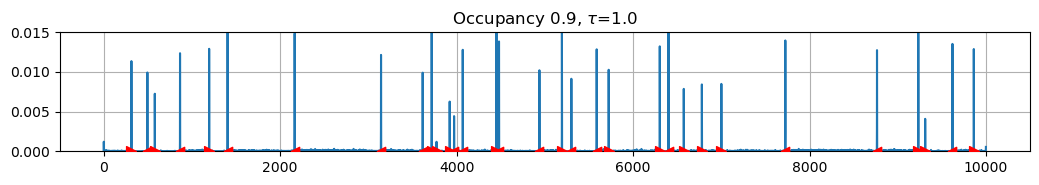

folder_face_1.0_back_0_Clife_1.0_Cof_3.0_life_1500.0_slife_1500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1
10000
0.00963408


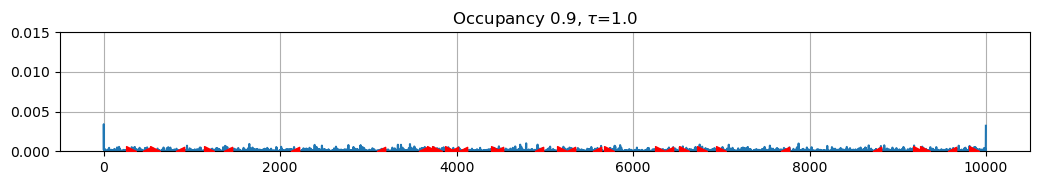

folder_face_1.0_back_0_Clife_10.0_Cof_15.0_life_1500.0_slife_1500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_3
10000
0.02016793


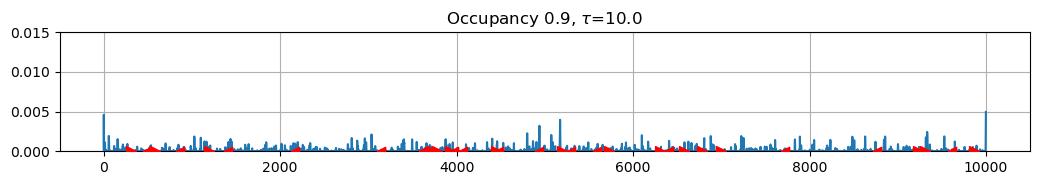

folder_face_1.0_back_0_Clife_100.0_Cof_1.25_life_166.0_slife_166.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_0.33
10000
0.06701134


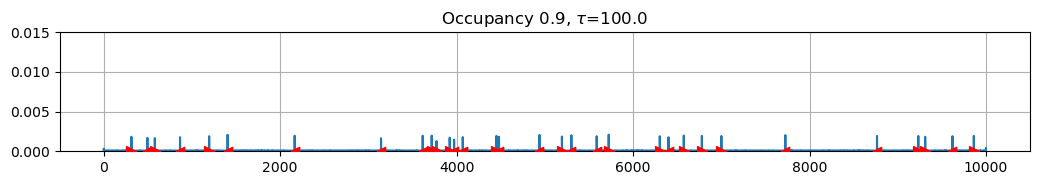

folder_face_1.0_back_0_Clife_12.5_Cof_0.5_life_166.0_slife_166.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1
10000
0.06225718


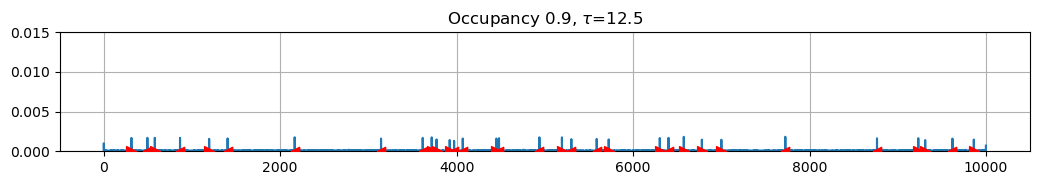

folder_face_1.0_back_0_Clife_15.0_Cof_0.1_life_166.0_slife_166.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_3
10000
0.22718037


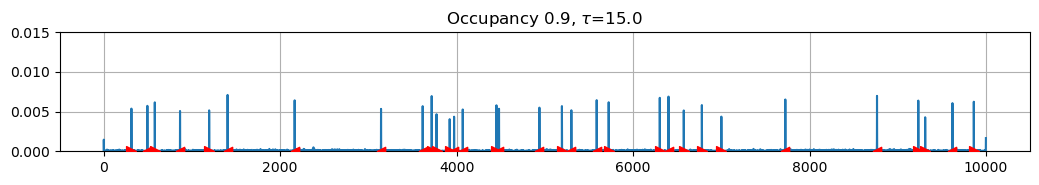

folder_face_1.0_back_0_Clife_15.0_Cof_3.0_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_0.33
10000
0.0234261


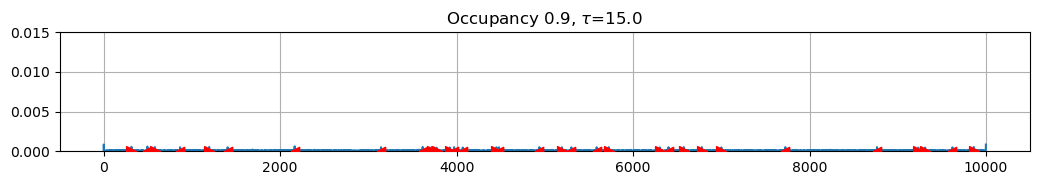

folder_face_1.0_back_0_Clife_150.0_Cof_10.0_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_1
10000
0.16409943


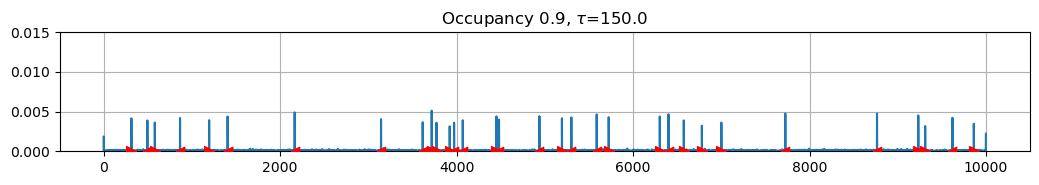

folder_face_1.0_back_0_Clife_1500.0_Cof_1.0_life_500.0_slife_500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_3
10000
0.6224216


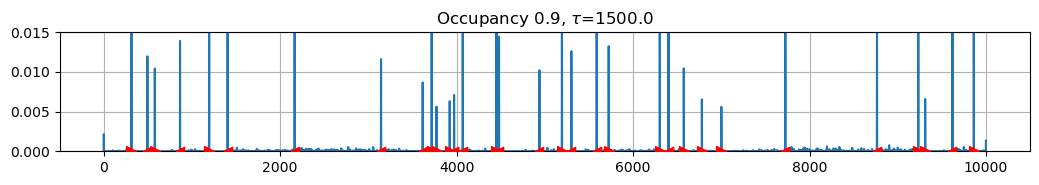

folder_face_1.0_back_0_Clife_2.0_Cof_0.5_life_1500.0_slife_1500.0_birth_0.1_pause_0.9_sep_100_site_10_monomer_1000_replica_10_steps_20.0_vel_0.33
10000
0.02618758


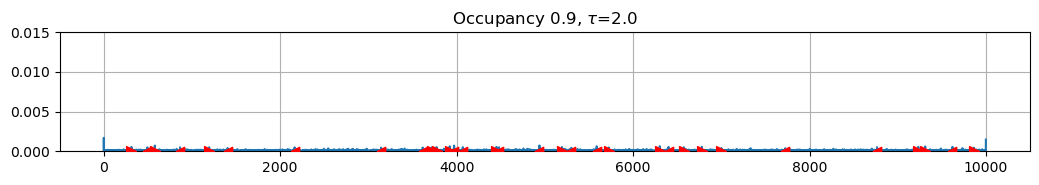

In [8]:
window_size = 1
numx,numy = 1,len(path_dict)
min_time = -500000
c=0
#plt.figure(figsize=(10.5,1.95*len(path_dict)))
hist_dict = {}
#lst = np.arange(0,10001,500)
for name in list(path_dict.keys())[:1000:100]:
    print(name)
    #print(path_dict[name])
    params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
    face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params

    c+=1
    #plt.subplot(numy,numx, c)

    mapN=mon*site
    print(mapN)
    #print(path_dict[name]+'/LEFPositions.h5')
    lefs = h5py.File(path_dict[name]+'/LEFPositions.h5','r')["positions"]
    
    
    lef_lefts = lefs[min_time:,:,0].flatten()
    lef_rights = lefs[min_time:,:,1].flatten()
    lef_positions = np.hstack((lef_lefts,lef_rights))

    peak_monomers = peak_positions(lst_t,window_sizes=np.arange(-window_size,(window_size)+1) )
    frip = FRiP(mapN * rep, lef_positions, peak_monomers)
    print(frip)


    plt.figure(figsize = (10.5,1.95))
    a,b = np.histogram(  np.mod( np.hstack((lef_lefts,lef_rights)) , mapN ), np.arange(0,mapN,1))
    #print(b)
    plt.plot(a/np.sum(a), label=name)
    plt.scatter(ctcfrightlist,np.zeros(len(ctcfrightlist)),marker='>',color='red',s=50,zorder=3)
    plt.scatter(ctcfleftlist,np.zeros(len(ctcfleftlist)),marker='<',color='red',zorder=3)
    plt.ylim([0,.015])
    plt.grid(True)
    hist_dict[name] = a/np.sum(a)
    plt.title(r'Occupancy 0.9, $\tau$=%s'%(clife))
    #a,b = np.histogram(  np.mod(lefs[-100:,:,0].flatten(),300 ), np.arange(301))
    #plt.plot(a)
    plt.savefig('chipseq_for_%s.png'%clife)
    
    plt.tight_layout()
    plt.show()


### calculating and writing FRiPs 

In [10]:
window_size = 1

file = open('fripscore.csv', 'w')
file.write('lifetime, velocity, clife, cof, fripscore\n')
i = 1
for name in list(path_dict.keys())[:]:
    params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
    face, back, clife, cof, life, slife, birth, pause, sep, site, mon, rep, step, vel = params
    
    print(i)
    i += 1
    mapN=mon*site
    #print(np.round(cof,4))
    lefs = h5py.File(path_dict[name]+'/LEFPositions.h5','r')["positions"]

    lef_lefts = lefs[min_time:,:,0].flatten()
    lef_rights = lefs[min_time:,:,1].flatten()
    lef_positions = np.hstack((lef_lefts,lef_rights))


    peak_monomers = peak_positions(lst_t,window_sizes=np.arange(-window_size,(window_size)+1) )
    frip = FRiP(mapN * rep, lef_positions, peak_monomers)

    score = FRiP(mapN * rep, lef_positions, peak_monomers)
    print(score)
    file.write('%s,%s,%s,%s,%s\n'%(life, vel, clife, cof, score))
file.close()

1
0.08095204
2
0.05081208
3
0.06911416
4
0.05009597
5
0.05245707
6
0.07586312
7
0.06956954
8
0.05827115
9
0.0804737
10
0.04374701
11
0.04584713
12
0.06056355
13
0.03642319
14
0.04293567
15
0.0656357
16
0.04432978
17
0.04294171
18
0.06697072
19
0.03734953
20
0.03716708
21
0.05674194
22
0.02933728
23
0.03640835
24
0.06163327
25
0.033794
26
0.03786673
27
0.05652849
28
0.02997332
29
0.03192358
30
0.0557928
31
0.02593947
32
0.0337207
33
0.05524995
34
0.02908387
35
0.03428469
36
0.05692844
37
0.02785151
38
0.03558966
39
0.04768312
40
0.0238179
41
0.03168534
42
0.05407313
43
0.02560018
44
0.03271505
45
0.05352032
46
0.0125583
47
0.0176243
48
0.03171267
49
0.01339452
50
0.0188778
51
0.0322891
52
0.0130765
53
0.01871613
54
0.03497719
55
0.01283199
56
0.01382358
57
0.02016793
58
0.01239019
59
0.01635108
60
0.02676272
61
0.01289001
62
0.01761446
63
0.03480839
64
0.00963255
65
0.01133339
66
0.01409119
67
0.00992229
68
0.01076089
69
0.01309748
70
0.01010792
71
0.01017205
72
0.01260642
73
0.0197698


In [36]:
file = pd.read_csv('fripscore.csv')
file

,lifetime,velocity,clife,cof,fripscore
0,1500.0,0.33,10.0,0.5,0.080952
1,1500.0,1.00,10.0,0.5,0.050812
2,1500.0,3.00,10.0,0.5,0.069114
3,166.0,0.33,10.0,0.5,0.050096
4,166.0,1.00,10.0,0.5,0.052457
...,...,...,...,...,...
1464,166.0,3.00,7.5,0.3,0.075015
1465,500.0,0.33,7.5,0.3,0.219261
1466,500.0,1.00,7.5,0.3,0.069591
1467,500.0,3.00,7.5,0.3,0.070749


In [37]:
file = pd.read_csv('fripscore.csv')
file
lifetime = file['lifetime']
velocity = file[' velocity']
clife = file[' clife']
cof = file[' cof']

unique_life = np.unique(lifetime)
unique_vel = np.unique(velocity)
unique_clife = np.unique(clife)
unique_cof = np.unique(cof)

In [39]:
file = file[file[' clife']>3]

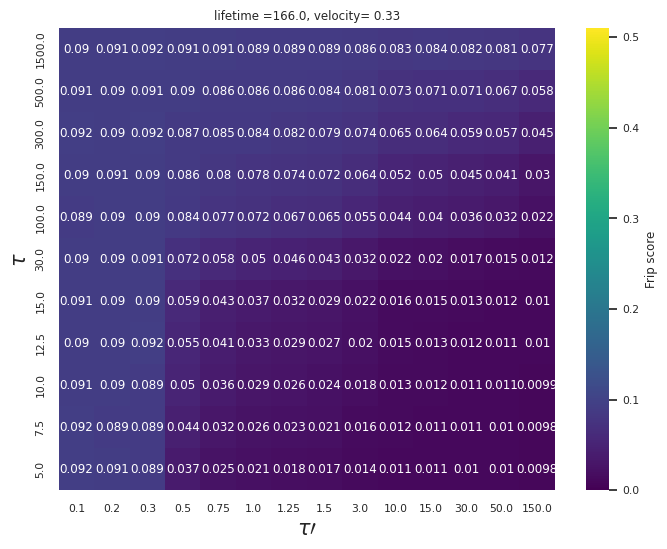

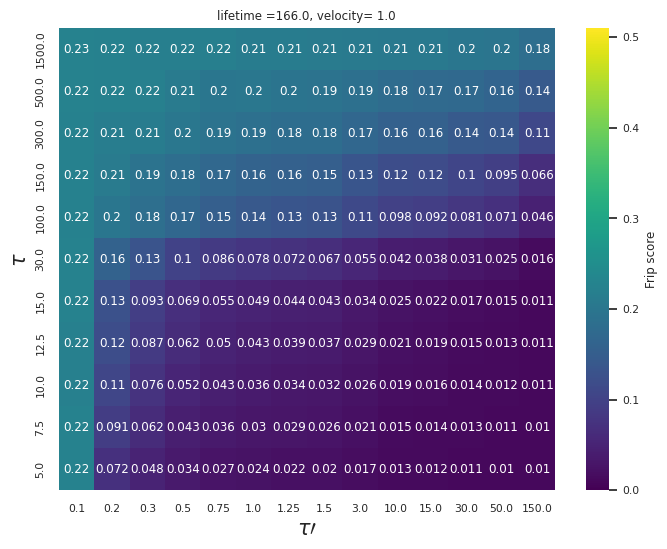

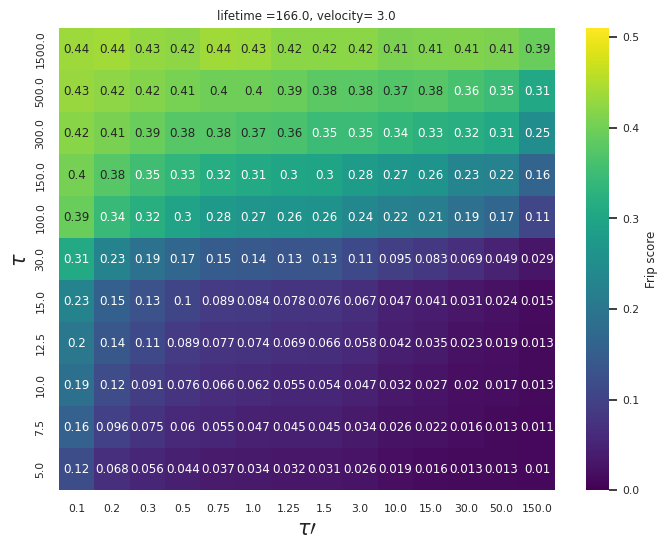

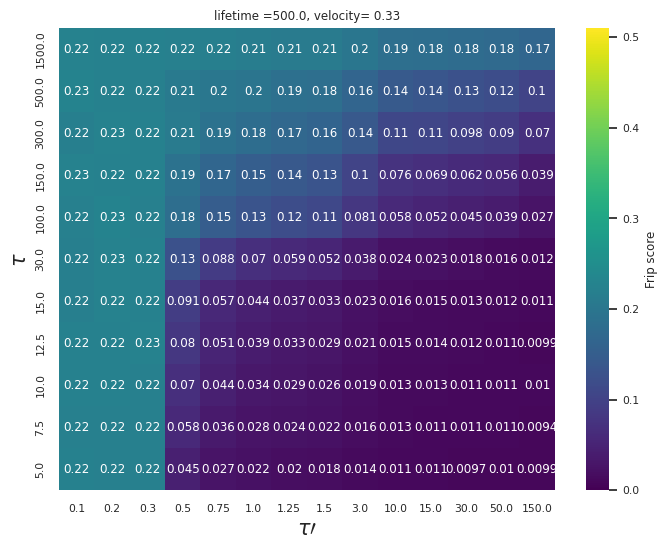

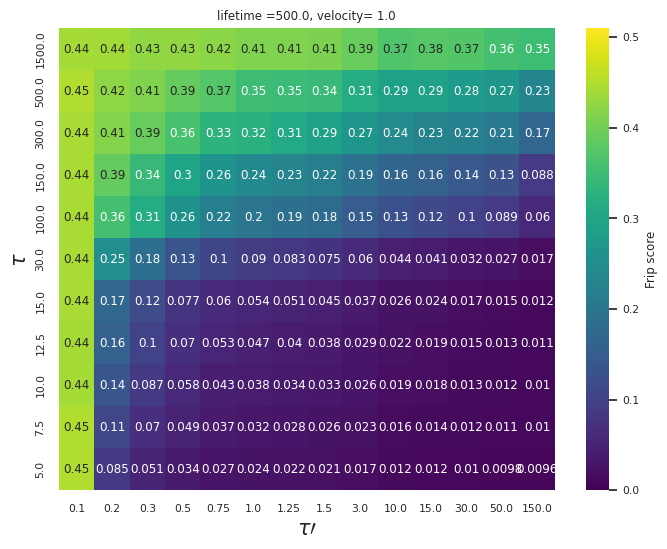

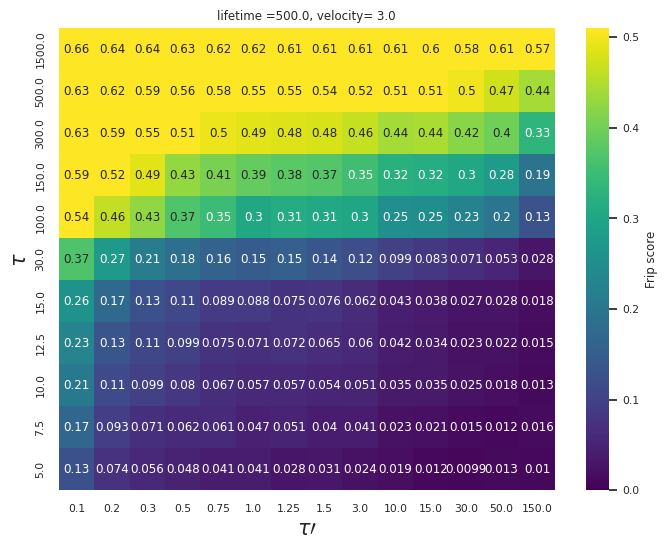

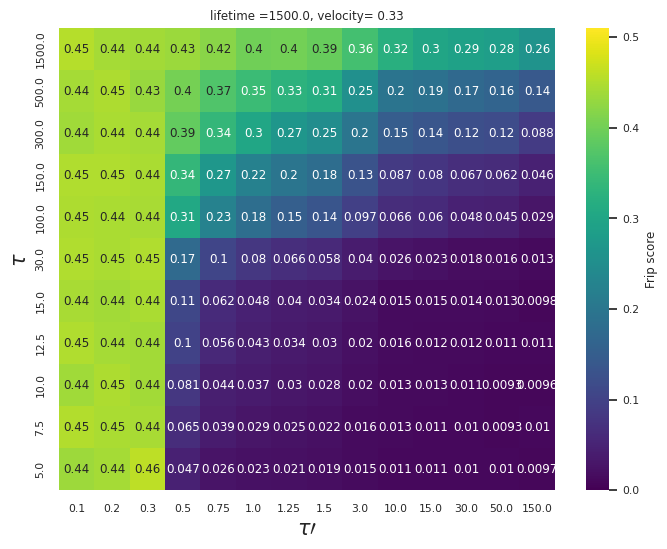

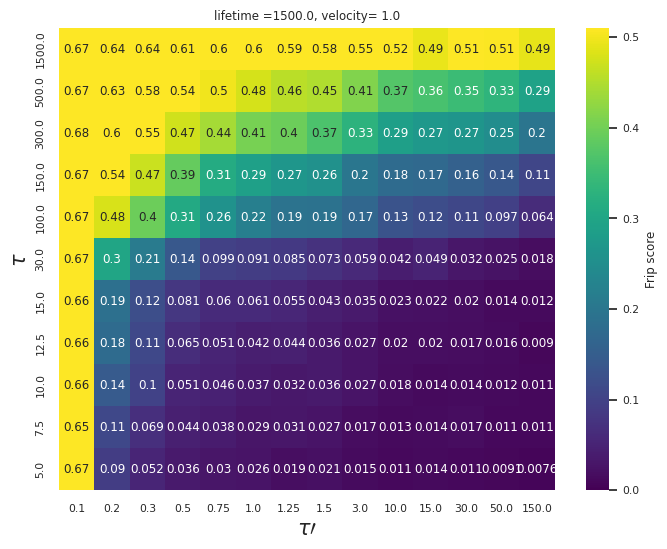

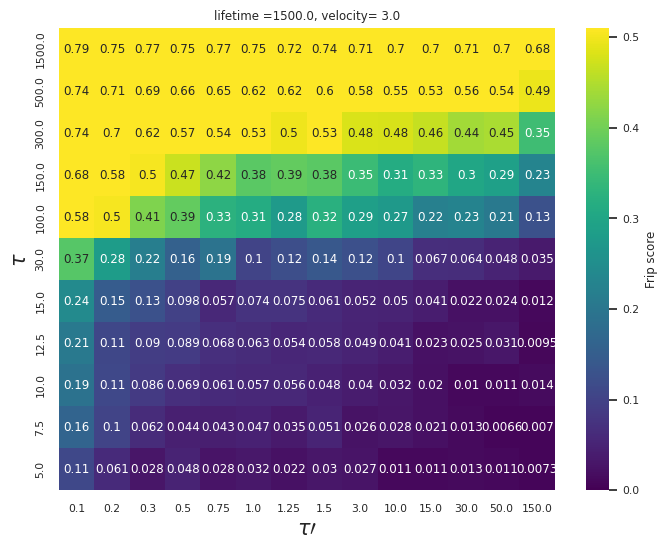

In [41]:
import seaborn as sns


for life in list(unique_life):
    for vel in list(unique_vel):
        new_file = file[(lifetime == life)&(velocity == vel) ][[' clife',' cof',' fripscore']]

        #print(new_file.value_counts(' clife', ' cof'))
        #print(new_file[new_file[' clife']==10.0])
        #print(new_file)
        #s = new_file.pivot_table(' clife', ' cof', ' fripscore', aggfunc='first')
        #print(s)
        new_file_filtered = new_file.drop_duplicates(keep = 'first')
        
        heatmap_data = new_file_filtered.pivot(' clife', ' cof', ' fripscore')
        
        
        # Create the heatmap using seaborn
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', vmin=0.0,vmax=0.51, cbar_kws={'label': 'Frip score'} )
        sns.set(font_scale=0.71)
        
        # Customize 
        plt.xlabel(r'$\tau\prime$', fontsize = 15)
        plt.ylabel(r'$\tau$', fontsize =15)
        plt.title('lifetime =%s, velocity= %s'%(life, vel))
        plt.gca().invert_yaxis()
        plt.savefig('isolation_for_%s_%s.png'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()

       clife     cof   fripscore
1096     1.0    0.10    0.446104
1295     2.0    0.20    0.040591
1331     3.0    0.30    0.034045
799      5.0    0.50    0.034371
1006     7.5    0.75    0.036592
25      10.0    1.00    0.037867
232     12.5    1.25    0.040363
340     15.0    1.50    0.045384
673     30.0    3.00    0.060478
151    100.0   10.00    0.125747
457    150.0   15.00    0.155481
781    300.0   30.00    0.222840
988    500.0   50.00    0.270113
565   1500.0  150.00    0.348691


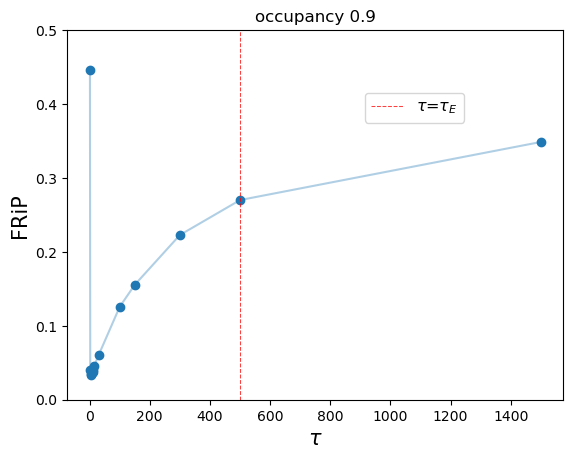

In [113]:
lifes, vels = [500] , [1]



for life in lifes:
    for vel in vels:
        new_file = file[(lifetime == life)&(velocity == vel)&(clife == 10*cof)][[' clife',' cof', ' fripscore']]
        new_file_filtered = new_file.drop_duplicates(keep = 'first')
        new_file_filtered = new_file_filtered.sort_values(' clife')
        print(new_file_filtered)
        new_clife = new_file_filtered[' clife']
        frip_score = new_file_filtered[' fripscore']
        plt.scatter(new_clife, frip_score)
        plt.plot(new_clife, frip_score, alpha = 0.35)
        plt.plot([life, life, life],[0,0.5,1],'--', color = 'red',alpha = 0.75, linewidth = 0.75, label = r'$\tau$=$\tau_E$')
        plt.ylim(0,0.5)
        plt.xlim()
plt.title('occupancy 0.9')
plt.xscale('log')
plt.legend(fontsize = 11.5,loc = (0.6,0.75))
plt.ylabel('FRiP',fontsize = 15)
plt.xlabel(r'$\tau$', fontsize = 15)
plt.savefig('frip_for_tau.png')
plt.show()
        

       clife   cof   fripscore
871      5.0   3.0    0.017139
1069     7.5   3.0    0.022653
79      10.0   3.0    0.026013
277     12.5   3.0    0.029456
376     15.0   3.0    0.036735
673     30.0   3.0    0.060478
178    100.0   3.0    0.148189
475    150.0   3.0    0.191148
772    300.0   3.0    0.268751
970    500.0   3.0    0.313132
574   1500.0   3.0    0.390933


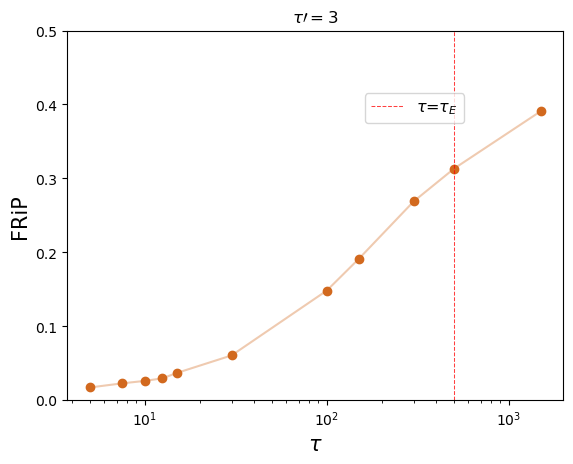

In [115]:
lifes, vels = [500] , [1]


cof_val = 3
for life in lifes:
    for vel in vels:
        new_file = file[(lifetime == life)&(velocity == vel)&(cof==cof_val)][[' clife',' cof', ' fripscore']]
        new_file_filtered = new_file.drop_duplicates(keep = 'first')
        new_file_filtered = new_file_filtered.sort_values(' clife')
        print(new_file_filtered)
        new_clife = new_file_filtered[' clife']
        frip_score = new_file_filtered[' fripscore']
        plt.scatter(new_clife, frip_score,color = 'chocolate')
        plt.plot(new_clife, frip_score, alpha = 0.35,color = 'chocolate')
        plt.plot([life, life, life],[0,0.5,1],'--', color = 'red',alpha = 0.75, linewidth = 0.75, label = r'$\tau$=$\tau_E$')
        plt.ylim(0,0.5)
        plt.xlim()
        plt.title(r'$\tau\prime = %s$'%cof_val)
plt.xscale('log')
plt.legend(fontsize = 11.5,loc = (0.6,0.75))
plt.ylabel('FRiP',fontsize = 15)
plt.xlabel(r'$\tau$', fontsize = 15)
plt.savefig('frip_for_occup.png')
plt.show()

### logarithmic color bar

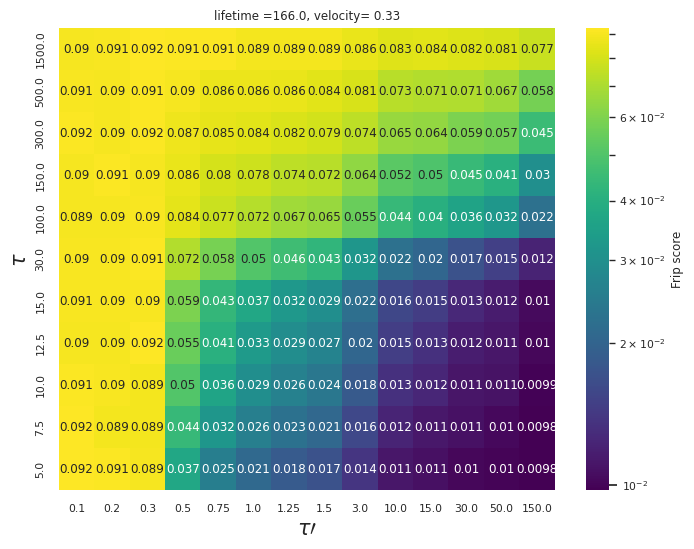

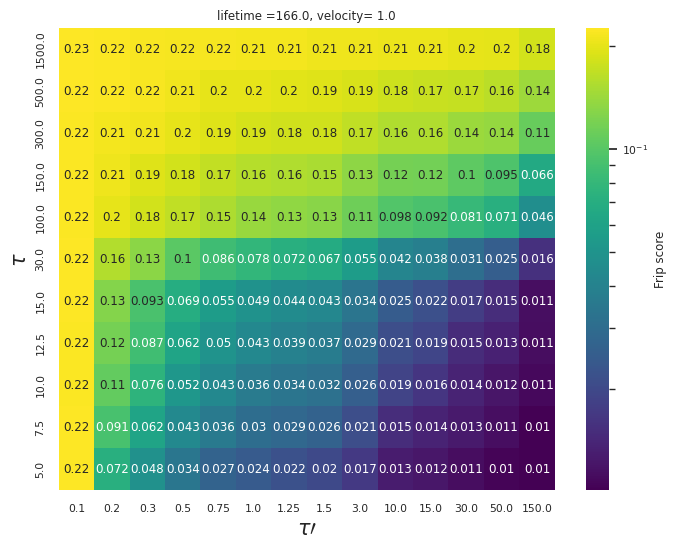

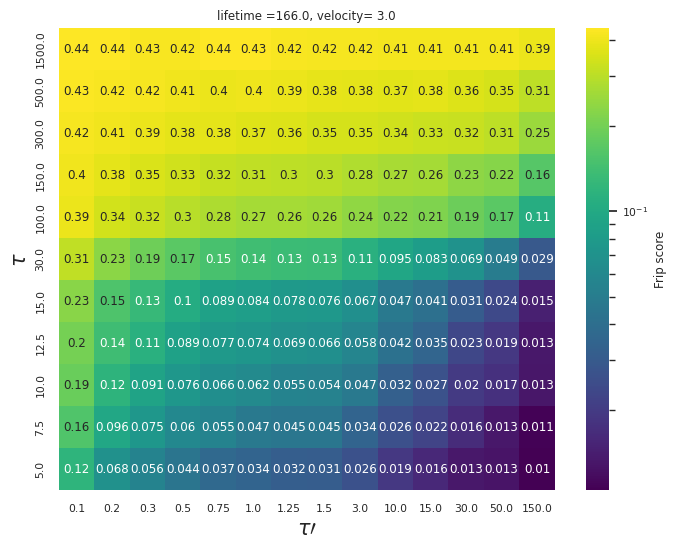

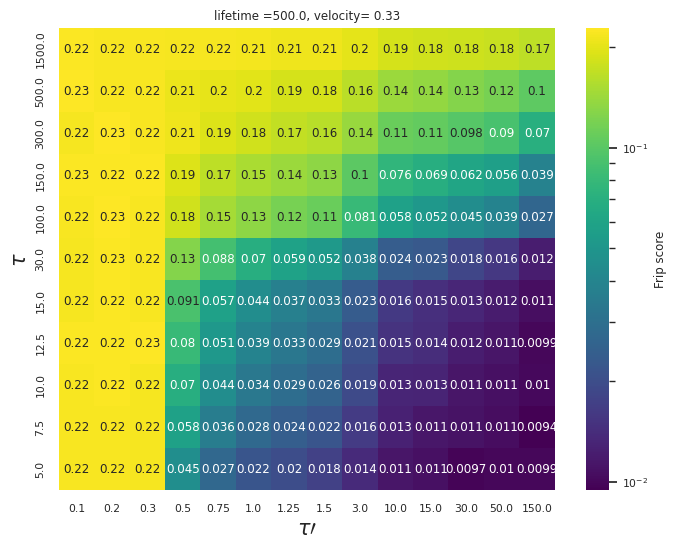

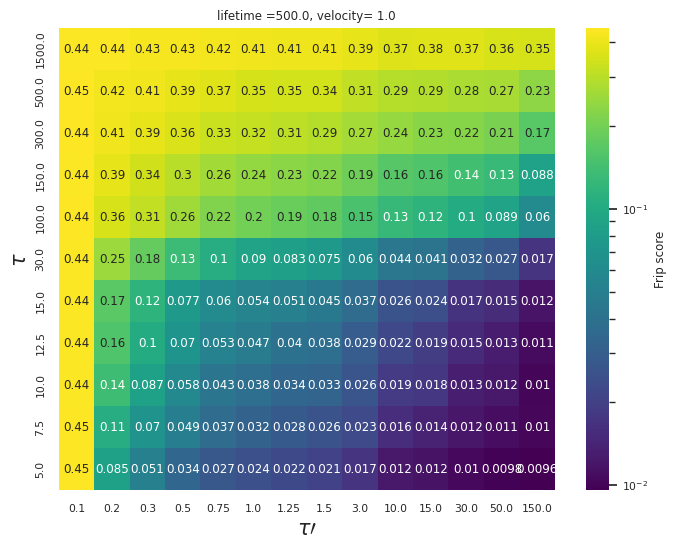

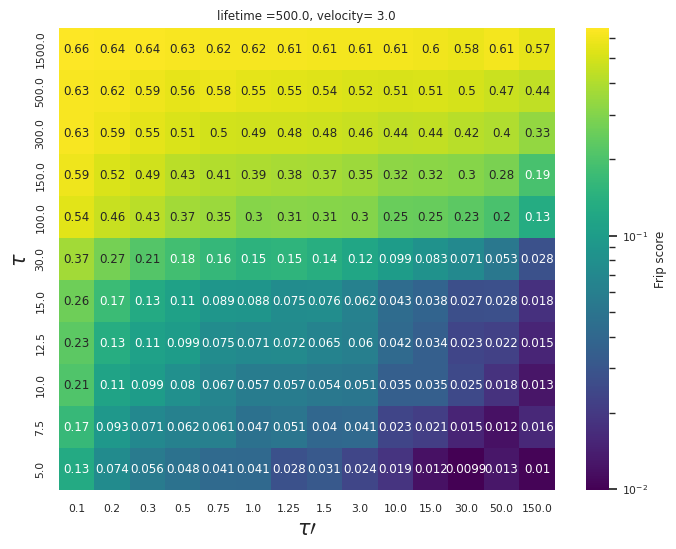

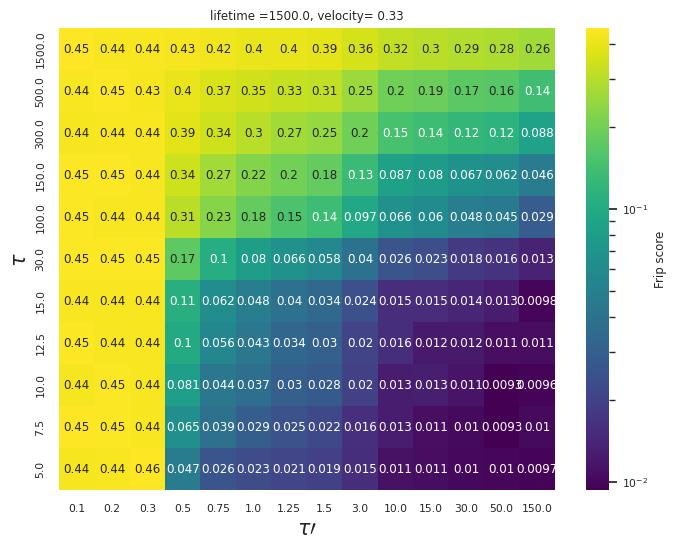

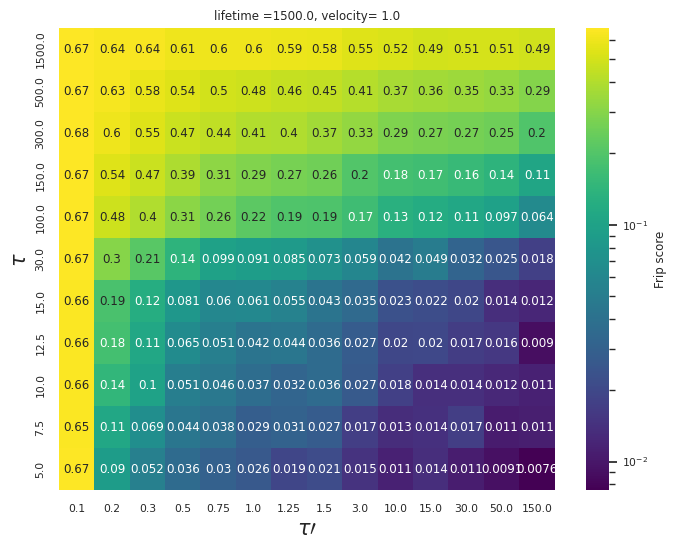

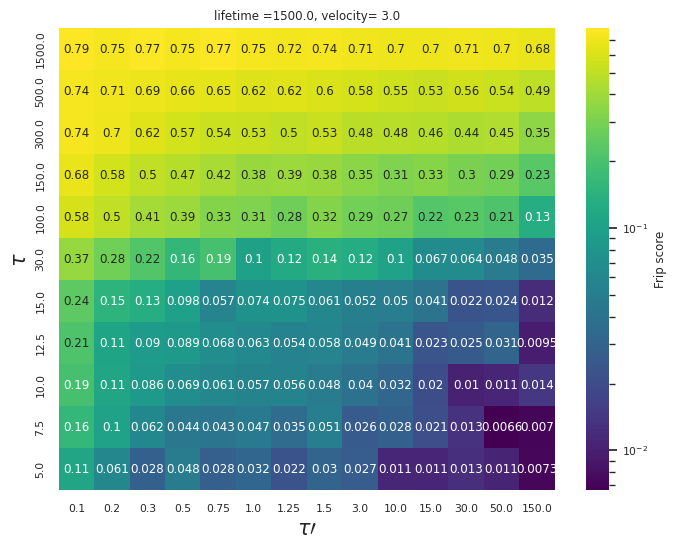

In [8]:
import seaborn as sns

from matplotlib.colors import LogNorm, Normalize
for life in list(unique_life):
    for vel in list(unique_vel):
        new_file = file[(lifetime == life)&(velocity == vel) ][[' clife',' cof',' fripscore']]

        #print(new_file.value_counts(' clife', ' cof'))
        #print(new_file[new_file[' clife']==10.0])
        #print(new_file)
        #s = new_file.pivot_table(' clife', ' cof', ' fripscore', aggfunc='first')
        #print(s)
        new_file_filtered = new_file.drop_duplicates(keep = 'first')
        
        heatmap_data = new_file_filtered.pivot(' clife', ' cof', ' fripscore')
        
        
        # Create the heatmap using seaborn
        plt.figure(figsize=(8, 6))
        im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', vmin=0.0,vmax=10, cbar_kws={'label': 'Frip score'}, norm = LogNorm() )
        sns.set(font_scale=0.71)
        
        # Customize 
        plt.xlabel(r'$\tau\prime$', fontsize = 15)
        plt.ylabel(r'$\tau$', fontsize =15)
        plt.title('lifetime =%s, velocity= %s'%(life, vel))
        plt.gca().invert_yaxis()
        plt.savefig('isolation_for_%s_%s_log.png'%(life, vel), transparent = True, bbox_inches = 'tight')
        plt.show()